<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_Project3_SugaryWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# for number-chrunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import and process the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# list number of unique values per column

for i in data.keys():
    print(f'{i} has {len(np.unique(data[i]))} unique values')

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


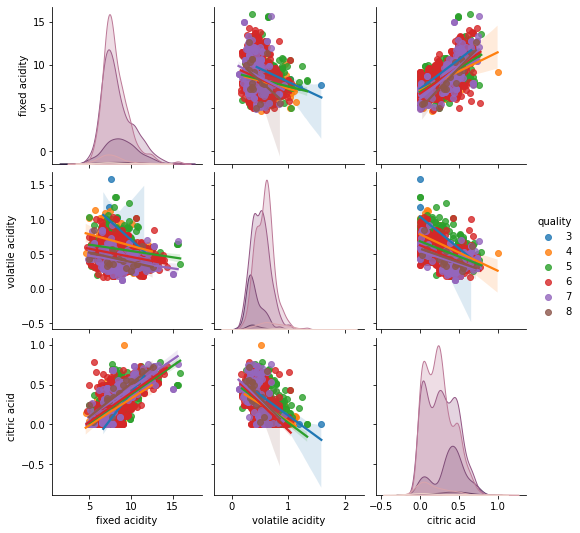

In [5]:
# pairwise plots
cols2plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'quality']
sns.pairplot(data[cols2plot], kind='reg', hue='quality')
plt.show()

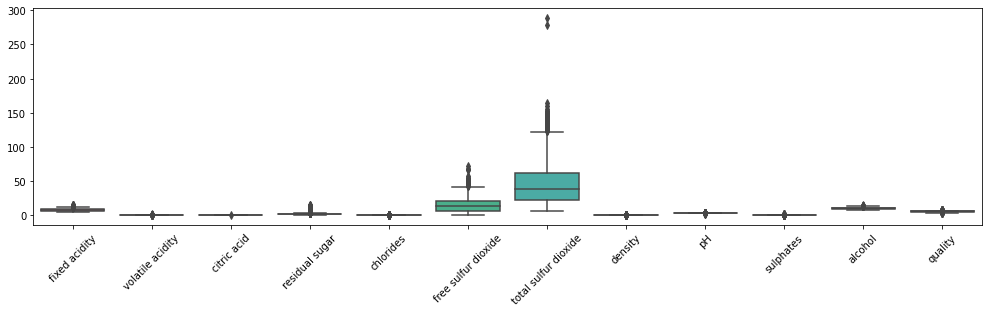

In [6]:
# plot some data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# remove rows with outliers
data = data[data['total sulfur dioxide'] < 200]

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('residual sugar')

# z-score (written out for clarity)
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data[col] = (data[col] - meanval) / stdev

# can also do more compactly
# data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,1.779694e-17,1.156801e-16,1.779694e-17,2.531590,-1.512740e-16,-1.779694e-17,-7.118775e-17,-8.357442e-14,3.025479e-16,8.008622e-17,-5.872989e-16,3.470403e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.395974,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,0.900000,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,-3.265829e+00
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,1.900000,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,-7.863762e-01
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,2.200000,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,4.533501e-01
75%,5.050372e-01,6.251419e-01,7.692848e-01,2.600000,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,4.533501e-01
max,4.350918e+00,5.876831e+00,3.753070e+00,15.500000,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,2.932803e+00


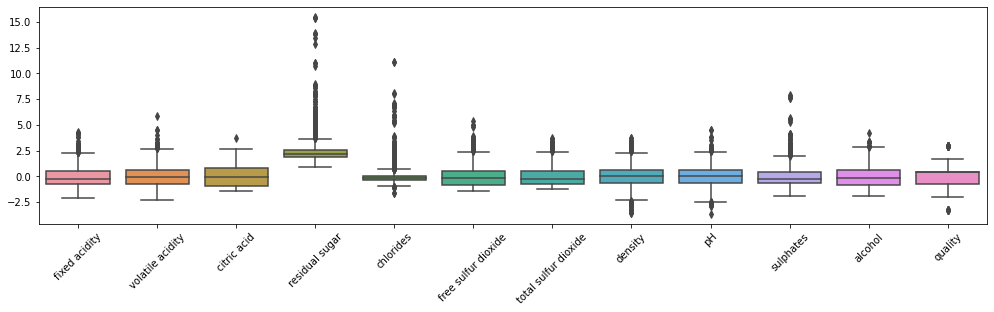

In [10]:
# check the plot again
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

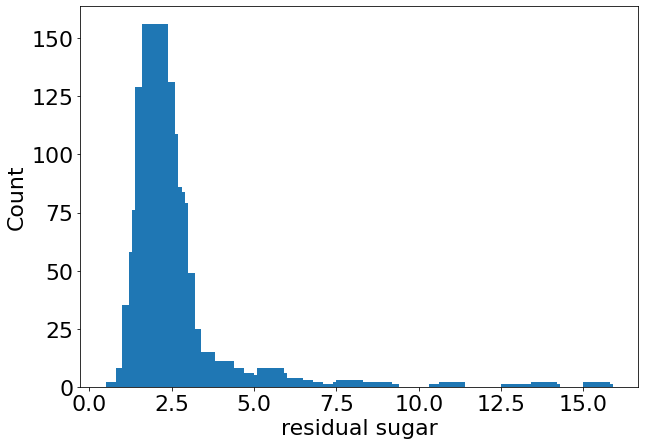

In [11]:
# distribution quality values
fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 22})

counts = data['residual sugar'].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel('residual sugar')
plt.ylabel('Count')
plt.show()

# # create a new column for binarized (boolean) quality
# data['boolQuality'] = 0
# # data ['boolQuality'][data['quality']<6] = 0
# data['boolQuality'][data['quality'] > 5] = 1

# data[['quality', 'boolQuality']]

## Reorganize the data: train/test in DataLoaders

In [12]:
randomIndices = np.random.randint(0, len(data), 10)
actual_sugar = data['residual sugar'][randomIndices]
actual_sugar

1009    2.8
774     1.8
478     2.2
1149    2.0
1534    2.4
852     2.5
878     4.0
853     1.5
68      2.0
372     1.8
Name: residual sugar, dtype: float64

In [13]:
data.loc[randomIndices, 'residual sugar'] = np.nan
data.loc[randomIndices, 'residual sugar']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


1009   NaN
774    NaN
478    NaN
1149   NaN
1534   NaN
852    NaN
878    NaN
853    NaN
68     NaN
372    NaN
Name: residual sugar, dtype: float64

In [14]:
data.isna().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar          10
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [21]:
test_dataset = data.iloc[randomIndices, :]
test_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1009,0.734642,-0.157025,0.460617,NaN,0.605117,0.972556,0.277412,0.248816,-0.853199,0.127797,0.450423,-0.786376
774,-0.241179,-0.715715,0.151950,NaN,1.476048,-1.326594,-0.036792,0.275352,-0.009670,1.484473,-0.865044,0.453350
478,0.734642,0.848618,-0.156718,NaN,-0.010907,-1.039200,-0.570938,1.087352,-1.112746,-0.344091,-0.207311,-0.786376
1151,-1.274400,0.289928,-0.208162,2.5,-0.924322,0.014577,0.748717,-1.714842,0.963632,-0.049161,1.953815,0.453350
1536,-1.274400,0.010583,-0.979831,1.9,-0.223329,0.780960,-0.036792,-0.780778,1.872047,0.127797,-0.113349,0.453350
852,-0.183777,-0.603977,0.254839,NaN,-0.159603,0.972556,2.382576,0.668084,-0.593651,2.428248,-0.677120,-0.786376
878,0.275432,0.457535,-0.413940,NaN,0.137788,1.355747,0.717297,0.593783,-0.593651,-0.933950,-0.395235,0.453350
853,0.562438,-0.939191,0.614951,NaN,-0.159603,2.409524,0.277412,-0.122687,1.028519,0.422726,0.450423,0.453350
68,0.562438,-1.162667,1.540953,NaN,-0.287056,1.068354,0.591616,0.078986,-0.204330,0.776642,0.262499,-0.786376
372,0.447636,-1.386143,1.077952,NaN,-0.435751,0.972556,-0.005371,-0.027157,0.055217,2.251290,0.168537,0.453350


In [22]:
print(data.shape)
train_dataset = data.dropna()
train_dataset.shape

(1597, 12)


(1587, 12)

In [31]:
# convert from pandas dataframe to tensor
train_dataT = torch.tensor(train_dataset[cols2zscore].values).float()
train_labels = torch.tensor(train_dataset['residual sugar'].values).float()

test_dataT = torch.tensor(test_dataset[cols2zscore].values).float()
test_labels = torch.tensor(actual_sugar.values).float()


# we'll actually need the labels to be a "tensor"
train_labels = train_labels[:, None]
test_labels = test_labels[:, None]


In [32]:

# then convert them into Pytorch Datasets
train_data = TensorDataset(train_dataT, train_labels)
test_data = TensorDataset(test_dataT, test_labels)

# finally, translate into dataloader objects
batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [33]:
train_loader.dataset.tensors[0]

tensor([[-0.5282,  0.9604, -1.3914,  ..., -0.5800, -0.9590, -0.7864],
        [-0.2986,  1.9660, -1.3914,  ...,  0.1278, -0.5832, -0.7864],
        [-0.2986,  1.2956, -1.1856,  ..., -0.0492, -0.5832, -0.7864],
        ...,
        [-1.1596, -0.1012, -0.7226,  ...,  0.5407,  0.5444,  0.4534],
        [-1.3892,  0.6531, -0.7741,  ...,  0.3048, -0.2073, -0.7864],
        [-1.3318, -1.2185,  1.0265,  ...,  0.0098,  0.5444,  0.4534]])

In [34]:
# check sizes of data batches
for X, y in train_loader:
    print(X.shape, y.shape)

torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 11]) torch.Size([16, 1])
torch.Size([16, 

In [35]:
test_loader.dataset.tensors[1]

tensor([[2.8000],
        [1.8000],
        [2.2000],
        [2.0000],
        [2.4000],
        [2.5000],
        [4.0000],
        [1.5000],
        [2.0000],
        [1.8000]])

In [36]:
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(11, 16)

        ## hidden layer
        self.fc1 = nn.Linear(16, 32)
        self.fc2 = nn.Linear(32, 32)

        ## output layer
        self.output = nn.Linear(32, 1)



    # forward pass
    def forward(self, x):

        # input (x starts off normalized)
        x = F.relu(self.input(x))

        #hidden layer 1
        x = F.relu(self.fc1(x))

        # hidden layer 2
        x = F.relu(self.fc2(x))

        return self.output(x)



In [37]:
# test the model
# use sigmoid, relu, tanh
net = ANNwine()
net(torch.randn(10, 11)).shape

torch.Size([10, 1])

In [38]:
# def Model():
#     ANNmodel = nn.Sequential(
#         nn.Linear(11, 64),
#         nn.Linear(64, 256),
#         nn.Linear(256, 64),
#         nn.Linear(64, 1)
#     )

#     lossfun = nn.BCEWithLogitsLoss()

#     optimizer = torch.optim.SGD(ANNmodel.parameters(), lr=0.001)

#     return ANNmodel, lossfun, optimizer

In [39]:
# tmpnet = ANNwine_withBNorm()
# tmpdata = torch.randn(32, 11)
# yhat = tmpnet.forward(tmpdata, True)
# yhat

## Train the model

In [40]:
numepochs = 1000

def trainTheModel():


    # loss function and optimizer
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(winenet.parameters(), lr=0.01)

    # initialize accuracies as empties

    trainLoss = torch.zeros(numepochs)
    testLoss = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        winenet.train()

        # loop over training data batches
        batchLoss = []
        for X, y in train_loader:
            
            # forward pass and loss
            yHat = winenet(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchLoss.append(loss.item())
        
        trainLoss[epochi] = np.mean(batchLoss)

        ### test accuracy
        winenet.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = winenet(X)
        testLoss[epochi] = lossfun(yHat, y).item()

    # function output
    return trainLoss, testLoss


## Run the Model

In [41]:

winenet = ANNwine()
trainLoss, testLoss = trainTheModel()


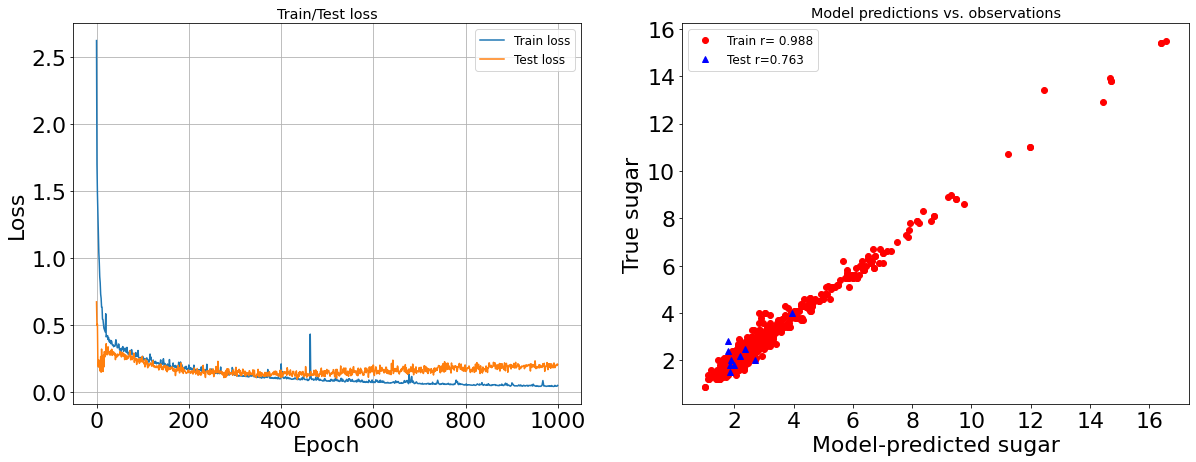

In [42]:
fig, ax = plt.subplots(1,2, figsize=(20, 7))
plt.rcParams.update({'font.size': 12})

ax[0].plot(trainLoss, label='Train loss')
ax[0].plot(testLoss, label='Test loss')
ax[0].set_title('Train/Test loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()

# show predictions and real values
yHatTrain = winenet(train_dataT)
yHatTest = winenet(test_dataT)
ax[1].plot(yHatTrain.detach(), train_labels, 'ro')
ax[1].plot(yHatTest.detach(), test_labels, 'b^')
ax[1].set_xlabel('Model-predicted sugar')
ax[1].set_ylabel('True sugar')
ax[1].set_title('Model predictions vs. observations')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHatTrain.detach().T, train_labels.T)[1, 0]
corrTest = np.corrcoef(yHatTest.detach().T, test_labels.T)[1, 0]
ax[1].legend([f'Train r={corrTrain: .3f}', f'Test r={corrTest:.3f}'])

plt.show()

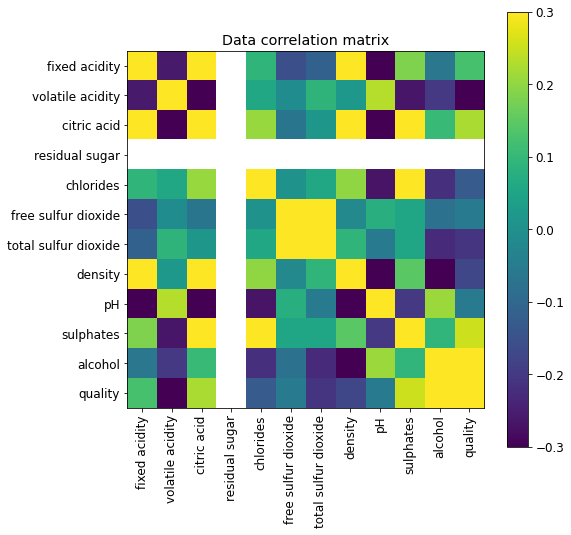

In [43]:
# Inspect the correlation matrix
fig = plt.figure(figsize=(8, 8))

plt.imshow(np.corrcoef(data.T), vmin=-.3, vmax=.3)
plt.xticks(range(len(data.keys())), labels=data.keys(), rotation=90)
plt.yticks(range(len(data.keys())), labels=data.keys())
plt.colorbar()
plt.title('Data correlation matrix')
plt.show()